# **初识神经网络**

## 1. 多元线性回归
我们以数学概念中的加权求和来理解神经网络中的可学习参数概念
这里，我们以一个三元线性回归作为示例：

<img src="./picture/regression_1.png" width=200>

$y = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b$

### 1.1 一个示例

In [1]:
import numpy as np
x = np.array([[2, 7, 9]])
w = np.array([3, 1, 2])
bias = 1
y = np.sum(w * x, axis = 1 ,keepdims=True) + bias
y

array([[32]])

基于以上示例，我们可以再精确一点定义我们的数据生成模式：
$y = 3 * x_1 + 1 * x_2 + 2 * x_3 + 1$

<img src="./picture/regression_2.png" width=200>


$y = 3 * x_1 + 1 * x_2 + 2 * x_3 + 1$

其中，$x_1,x_2,x_3$~$N(0,1)$

### 1.2 数据生成

In [2]:
import numpy as np
np.random.seed(100)
x = np.random.normal(size=(100,3), loc=0, scale=1)
w = np.array([3, 1, 2])
bias = 1
y = np.sum(w * x, axis = 1 ,keepdims=True) + bias

x_y = np.concatenate((x[:10,:],y[:10,:]), axis = 1)
x_y

array([[-1.74976547,  0.3426804 ,  1.1530358 , -1.60054441],
       [-0.25243604,  0.98132079,  0.51421884,  2.25245036],
       [ 0.22117967, -1.07004333, -0.18949583,  0.21450402],
       [ 0.25500144, -0.45802699,  0.43516349,  2.17730432],
       [-0.58359505,  0.81684707,  0.67272081,  1.41150353],
       [-0.10441114, -0.53128038,  1.02973269,  2.21495156],
       [-0.43813562, -1.11831825,  1.61898166,  1.80523821],
       [ 1.54160517, -0.25187914, -0.84243574,  3.68806491],
       [ 0.18451869,  0.9370822 ,  0.73100034,  3.95263896],
       [ 1.36155613, -0.32623806,  0.05567601,  4.86978235]])

这里，仅展示10个样本，我们可以验算一下，数据的生成是否符合规范：

### 1.3 验证数据生成是否准确

In [3]:
test = 3 * (-1.74976547) + 1 * (0.3426804) + 2 * (1.1530358) + 1 
test

-1.6005444100000004

数据验证完毕，接下来我们以最小二乘法来回归参数$w$和$b$:

### 1.4 最小二乘法回归参数

In [4]:
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()

# 最小二乘法 ---- 多元线性回归
lrModel.fit(x,y)
print("w: ",lrModel.coef_)
print("b: ", lrModel.intercept_)

w:  [[3. 1. 2.]]
b:  [1.]


有关最小二乘法的推导详见"OLS.ipynb".

### 1.5 定义线性回归的神经网络

In [5]:
import torch

x = torch.as_tensor(torch.from_numpy(x), dtype=torch.float32)
y = torch.as_tensor(torch.from_numpy(y), dtype=torch.float32)

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()     
        
        self.predict = torch.nn.Linear(n_feature, n_output)   # 输出层线性输出

    def forward(self, x): 
        x = self.predict(x) 
        return x

net = Net(n_feature=3, n_output=1)

print(net)  # net 的结构

Net(
  (predict): Linear(in_features=3, out_features=1, bias=True)
)


### 1.6 模型训练
在神经网络中，梯度是一个很重要的概念，我们需要理解以下几点：
1. 梯度即是求f(x)对x的各个维度求偏导
2. 函数f(x)的梯度方向是y的值增长最快的方向，变化最快，变化率最大
3. 梯度方向是函数f(x)局部上升最快的方向。也就说明梯度的负方向是局部下降最快的方向

<img src="./picture/grad_1.jpg" width=400>

因此，我们采用随机梯度下降法来优化模型参数，步骤如下：
1. 通过求导，找出函数f(x)在该点x梯度的负方向
2. 设定学习率 lr(learning rate), 将其作为梯度下降算法中的迭代步长

$$x = x + lr * (-dx)$$

3. 在每次迭代更新的时候，只考虑batch中的一个样本点

In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

for i in range(200):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if i < 6:
        print("loss: ", loss)
        
    if i % 50 == 0:
        print("loss: ", loss)

loss:  tensor(18.5364, grad_fn=<MseLossBackward>)
loss:  tensor(18.5364, grad_fn=<MseLossBackward>)
loss:  tensor(6.1637, grad_fn=<MseLossBackward>)
loss:  tensor(2.1547, grad_fn=<MseLossBackward>)
loss:  tensor(0.7848, grad_fn=<MseLossBackward>)
loss:  tensor(0.2951, grad_fn=<MseLossBackward>)
loss:  tensor(0.1136, grad_fn=<MseLossBackward>)
loss:  tensor(1.5401e-13, grad_fn=<MseLossBackward>)
loss:  tensor(1.5401e-13, grad_fn=<MseLossBackward>)
loss:  tensor(1.5401e-13, grad_fn=<MseLossBackward>)


### 1.7 查看回归的参数是否准确

In [7]:
for parameters in net.parameters():
    print(parameters)


# np.txtsave("./result.txt", )

Parameter containing:
tensor([[3.0000, 1.0000, 2.0000]], requires_grad=True)
Parameter containing:
tensor([1.0000], requires_grad=True)


In [8]:
params = list(net.named_parameters())
w = params[0][1][0].detach().numpy()
b = params[1][1][0].detach().numpy()

np.savetxt("./results/weight.txt", w)

至此，我们已经理解神经网络的基本工作原理：

即基于梯度grad更新参数，每次沿着反梯度方向迈进一小步，直至寻到一个最优解

## 2. 特征与基底的概念 ---- 隐藏层(hidden layer)

### 2.1 基底的概念

在线性代数中，我们有一个叫做基底的概念，以三维空间(x, y, z)为例:

    我们可以设置一组基为:
    
$$i_1 = (1, 0, 0), i_2 = (0, 1, 0), i_3 = (0, 0, 1)$$

那么任意坐标$(x,y,z)$就可以表示为$(x,y,z)=x*i_1+y*i_2+z*i_3$

$(4,7,3) = 4*i_1+7*i_2+3*i_3 = 4 * (1, 0, 0) + 7 * (0, 1, 0) + 3 * (0, 0, 1)$
$(2,9,7) = 2*i_1+9*i_2+7*i_3 = 2 * (1, 0, 0) + 9 * (0, 1, 0) + 7 * (0, 0, 1)$

那么，针对于$(4,7,3)$和$(2,9,7)$这种类型的$(x, y = x+z, z)$这样的数据,我们可以创造这样一组基：
$$e_1 = (1, 1, 0), e_2 = (0, 1, 1), e_3 = (0, 0, 1)$$

$(4,7,3) = 4*e_1+3*e_2+0*e_3 = 4 * (1, 1, 0) + 3 * (0, 1, 1) + 0 * (0, 0, 1)$
$(2,9,7) = 2*e_1+7*e_2+0*e_3 = 2 * (1, 1, 0) + 7 * (0, 1, 1) + 0 * (0, 0, 1)$


$(4,7,3) = (4e_1, 3e_2, 0)$

$(2,9,7) = (2e_1, 7e_2, 0)$

在特定场景下，适当变换基底有助于模型计算。

### 2.2 特征的概念 ---- 隐藏层(hidden layer)

在神经网络中，有隐藏层这样一个概念，目的在于提取输入数据的一些抽象表征。

同理，在数学中，这就代表的是进行一组基变换，找到一组更加适合模型计算的计算模式。

但是，我们会发现，在神经网络中，基底(即隐藏层特征)的数量可以大于数据输入维度，也可以小于数据输入维度。

我们暂时先不讨论这一点，这一点将在下文中通过非线性激活函数(Relu)来解释。

<img src="./picture/network_1.jpg" width=300>

简单来看上述的网络模型：

3维的输入: $x_1,x_2,x_3$

4维的特征: $h_1,h_2,h_3,h_4$

2维的输出: $y_1,y_2$

$h_1 = w_{11} * x_1 + w_{21} * x_2 + w_{31} * x_3 + b_1$

$h_2 = w_{12} * x_1 + w_{22} * x_2 + w_{32} * x_3 + b_2$

$h_3 = w_{13} * x_1 + w_{23} * x_2 + w_{33} * x_3 + b_3$

$h_4 = w_{14} * x_1 + w_{24} * x_2 + w_{34} * x_3 + b_4$

$y_1 = w^{11} * h_1 + w^{21} * h_2 + w^{31} * h_3 + w^{41} * h_4 + b^1$

$y_2 = w^{12} * h_1 + w^{22} * h_2 + w^{32} * h_3 + w^{42} * h_4 + b^2$

在数学里面，通过基变换，我们可以更方便求解一些数学问题。

但是在神经网络里面，这样的特征变换，本质上其实没有任何改变，他还是一个线性的加权求模型：

$y_1 = w^{11} * h_1 + w^{21} * h_2 + w^{31} * h_3 + w^{41} * h_4 + b^1$

$    = w^{11} * \{w_{11} * x_1 + w_{21} * x_2 + w_{31} * x_3 + b_1\} + ... + w^{41} * \{w_{14} * x_1 + w_{24} * x_2 + w_{34} * x_3 + b_4\} + b^1$

$    = \{w^{11} * w_{11} + w^{21} * w_{12} + w^{31} * w_{13} + w^{41} * w_{14}\} * x_1 + ...$

$    = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b$

这也就是说，到此为止，我们的神经网络还都是只能进行线性任务，那么接下来我们将引进非线性激活函数的概念，使得神经网络可以拟合任意函数。

## 3. 非线性激活函数

之前我们已经讲到，在神经网络中，基底(即隐藏层特征)的数量可以大于数据输入维度，也可以小于数据输入维度。

<img src="./picture/network_1.jpg" width=300>

如图，这就是一个隐藏层特征维度大于输入维度的一个示例。

但，我们后来也分析到了，简单通过神经网络的全连接层(线形层: 加权求和)求取隐藏层的特征，最后再拟合输出结果，这将仍然是一个线性模型，模型的局限性非常大，也几乎没有应用场景。

因此，我们在每一层线形层的加权求和之后，还要再加入一层非线性激活函数，这时候隐藏层的特征就不再是对输入加权求和的直接结果了，而是对上一维度输入的更抽象的特征提取了。

<img src="./picture/activation_1.png" width=1000>

万能近似定理（universal approximation theorem）(Hornik et al., 1989;Cybenko, 1989) 表明，一个前馈神经网络如果具有线性输出层和至少一层具有任何一种‘‘挤压’’ 性质的激活函数（例如logistic sigmoid激活函数）的隐藏层，只要给予网络足够数量的隐藏单元，它可以以任意的精度来近似任何从一个有限维空间到另一个有限维空间的Borel 可测函数

### 3.1 数据生成

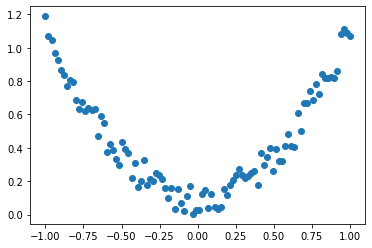

In [9]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 3.2 非线性激活层以及网络搭建

In [10]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


### 3.3 模型训练以及拟合结果

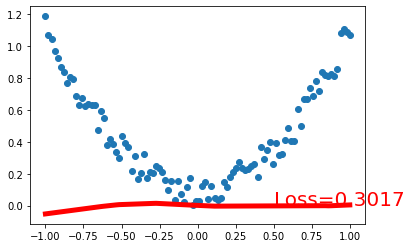

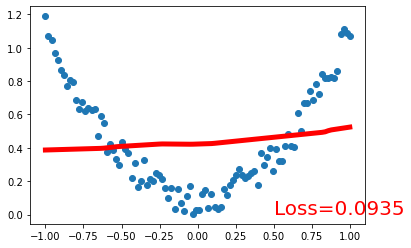

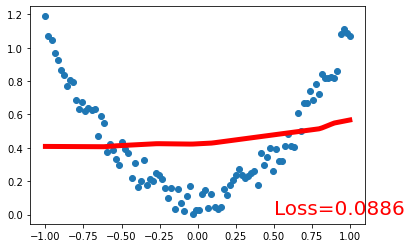

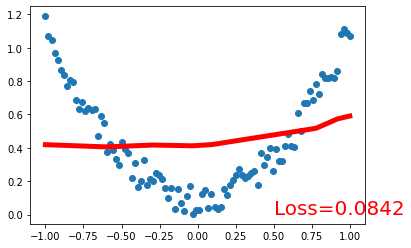

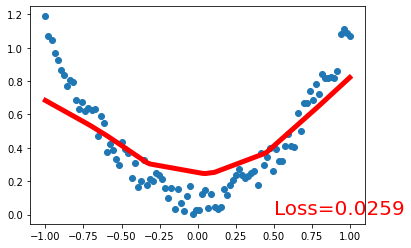

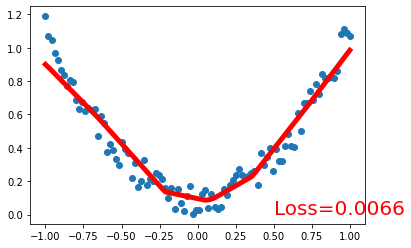

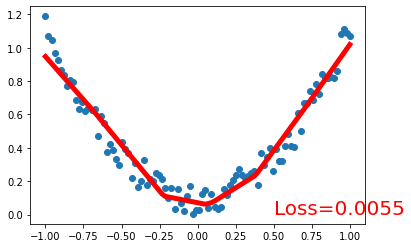

In [11]:
import matplotlib.pyplot as plt

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

plt.ion()   # 画图
plt.show()

for t in range(200):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()
    optimizer.step()

    # 接着上面来
    if t % 50 == 0 or (t < 10 and t % 3 == 1 ):
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

神经网络五部曲：
1. 数据预处理
2. 网络搭建
3. 梯度优化算法及学习率选取
4. 损失函数定义
5. 梯度回传 ---- 链式求导法则

## 4. 卷积神经网络

要形象理解卷积神经网络并不难，它与上述的前馈神经网络并无太大区别，只是它多了一个核心模块: 
卷积核。

### 4.1 为什么要用卷积核而不再采用上述的前馈全连接神经网络？

64\*64像素的图片: 64\*64\*3=12288
特征向量X，维度为12288

1000\*1000像素的图片: 1000\*1000\*3=3000000
特征向量X的维度三百万

即一张图片的输入数据就有3000000个节点，如果我们的神经网络仅含一层大小仅为256个神经元节点的隐藏层，目标输出为10分类，
那么神经网络的参数一共会有: 3000000\*256+256\*10 = 768002560

我们将会有接近7亿的数据，而这还仅仅是单层的神经网络，而在实际场景中，我们的神经网络已经加深到50层，100层，1000层，而且一口气将3000000个节点压缩为256维度的特征也明显是不合适的，提取的特征可能还远不足够，那么面对这样的参数爆炸，就提出了卷积核的概念。

在上述的回归任务中，我们对输入序列是通过线性加权然后非线性激活进行一层层网络搭建的。

而在图像这样的结构化数据中，是存在着时空关联的，我们从单个像素点可能无法分析出任何数据，但将局部的数据一起分析，往往能够起到奇效。

### 4.2 卷积核 ---- 图像局部特征提取

用于垂直边缘特征提取的卷积核: 

<img src="./picture/CNN_1.png" width=400>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[3,0,1,2,7,4],[1,5,8,9,3,1],[2,7,2,5,1,3],[0,1,3,1,7,8],[4,2,1,6,2,8],[2,4,5,2,3,9]])

filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

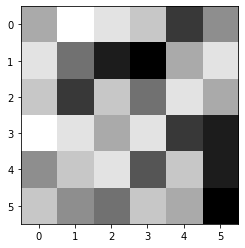

In [13]:
plt.imshow(x, cmap='gray_r')

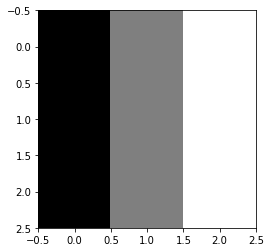

In [14]:
plt.imshow(filter, cmap='gray_r')

In [15]:
def convolution(i,j,x,filter):
    image = x[i-1:i+2, j-1:j+2]
    sum = np.sum(np.multiply(image,filter))
    return sum

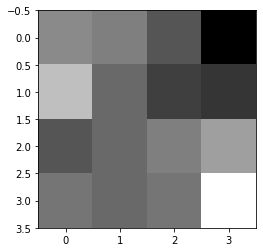

In [16]:
x_cnn = np.zeros((6,6))
for i in range(1,5):
    for j in range(1,5):
        x_cnn[i,j] = convolution(i,j,x,filter)

plt.imshow(x_cnn[1:5,1:5], cmap='gray_r')

这可能还不是很直观，接下来以更极端的例子进行展示: 

[[1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0]]


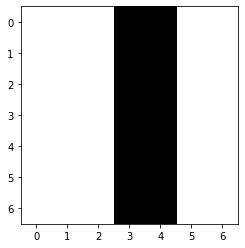

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0],[1,1,1,1,1,0,0,0,0]])
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

def convolution(i,j,x,filter):
    image = x[i-1:i+2, j-1:j+2]
    sum = np.sum(np.multiply(image,filter))
    return sum

x_cnn = np.zeros((9,9))
for i in range(1,8):
    for j in range(1,8):
        x_cnn[i,j] = convolution(i,j,x,filter)
print(x)
plt.imshow(np.abs(x_cnn[1:8,1:8]), cmap='gray_r')

### 4.3 真实图像的边缘特征提取
因为上述图片大小过小，视觉信息不明显，接下来我们将以真实图片进行边缘特征提取

<img src="./picture/CNN_2.jpg" width=200>

img: (256, 256)
[[0.45588235 0.49117647 0.46388235 ... 0.63631373 0.68337255 0.68337255]
 [0.46678431 0.43627451 0.46694118 ... 0.63239216 0.61670588 0.68729412]
 [0.47070588 0.41666667 0.46301961 ... 0.64807843 0.61670588 0.67945098]
 ...
 [0.46278431 0.36356863 0.38796078 ... 0.80337255 0.59160784 0.65392157]
 [0.444      0.42831373 0.40478431 ... 0.66219608 0.58333333 0.83039216]
 [0.43615686 0.39690196 0.31847059 ... 0.58376471 0.77156863 0.91666667]]


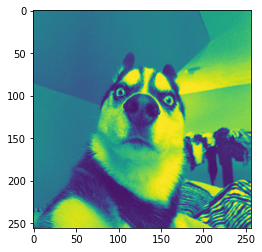

In [18]:
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread("./picture/CNN_2.jpg")
x = (img[:,:,0] * 0.3 + img[:,:,1] * 0.59 + img[:,:,2] * 0.11)/255
print("img:",x.shape)
print(x)
plt.imshow(x)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


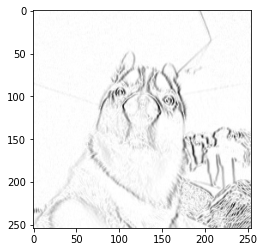

In [19]:
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print(filter)
def convolution(i,j,x,filter):
    image = x[i-1:i+2, j-1:j+2]
    sum = np.sum(np.multiply(image,filter))
    return sum

x_cnn = np.zeros((256,256))
for i in range(1,255):
    for j in range(1,255):
        x_cnn[i,j] = convolution(i,j,x,filter)
x_1 = np.abs(x_cnn[1:255,1:255])
plt.imshow(np.abs(x_cnn[1:255,1:255]), cmap='gray_r')

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


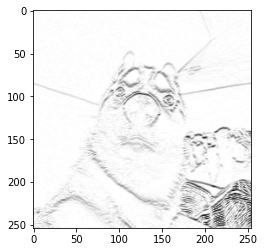

In [20]:
filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
print(filter)
def convolution(i,j,x,filter):
    image = x[i-1:i+2, j-1:j+2]
    sum = np.sum(np.multiply(image,filter))
    return sum

x_cnn = np.zeros((256,256))
for i in range(1,255):
    for j in range(1,255):
        x_cnn[i,j] = convolution(i,j,x,filter)
x_2 = np.abs(x_cnn[1:255,1:255])
plt.imshow(np.abs(x_cnn[1:255,1:255]), cmap='gray_r')

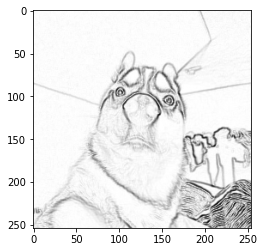

In [21]:
plt.imshow(x_1+x_2, cmap='gray_r')

在卷积神经网络中，卷积核起到的就是这样的一种特征提取的功能，在每一层网络中，都将具有多个卷积核，得到的一个特征映射图像就称之为一个信息通道，即每一层网络用了几个卷积核，提取了几个特征映射图，那么就有多少个通道(channel)

并且神经网络是通过梯度回传更新上述卷积核中的参数的，所以提取的特征都是为了为了最终任务而准备的。

即filter中的参数都是可学习参数，由梯度回传进行更新。

类比于先前介绍的前馈神经网络中的权重参数。

## 5. 构建一个真实分类任务 ---- mnist(手写数字符识别)

### 5.1 引入相关包

In [22]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Hyper Parameters
EPOCH = 1           
BATCH_SIZE = 50
LR = 0.001 
DOWNLOAD_MNIST = True

### 5.2 数据集

In [25]:
# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='./data/', 
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),   
    download=DOWNLOAD_MNIST,
)

test_data = torchvision.datasets.MNIST(root='./data/', train=False)

# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 为了节约时间, 我们测试时只测试前2000个
test_x = torch.unsqueeze(test_data.data, dim=1).type(torch.FloatTensor)[:2000]/255. 
test_y = test_data.targets[:2000]

### 5.3 卷积网络构建

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(            # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1, 
                out_channels=16, 
                kernel_size=5, 
                stride=1,                      # filter movement/step
                padding=2,                     # 如果想要 con2d 出来的图片长宽没有变化, padding=(kernel_size-1)/2 当 stride=1
            ),                                 # output shape (16, 28, 28)
            nn.ReLU(),                         # activation
            nn.MaxPool2d(kernel_size=2),       # 在 2x2 空间里向下采样, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(            # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),        # output shape (32, 14, 14)
            nn.ReLU(),  # activation
            nn.MaxPool2d(2),                   # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)              # 展平成 (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

cnn = CNN()
print(cnn)  

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


### 5.4 选择优化方式和定义损失函数

In [27]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

### 5.5 模型训练

In [28]:
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader): 
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        
        if step % 200 == 0:
            print(step, "\\ 1200: ", loss)
        
        if step == len(train_loader) - 1:
            print(1200, "\\ 1200: ", loss)

0 \ 1200:  tensor(2.3125, grad_fn=<NllLossBackward>)
200 \ 1200:  tensor(0.2348, grad_fn=<NllLossBackward>)
400 \ 1200:  tensor(0.0663, grad_fn=<NllLossBackward>)
600 \ 1200:  tensor(0.0414, grad_fn=<NllLossBackward>)
800 \ 1200:  tensor(0.2327, grad_fn=<NllLossBackward>)
1000 \ 1200:  tensor(0.0111, grad_fn=<NllLossBackward>)
1200 \ 1200:  tensor(0.0421, grad_fn=<NllLossBackward>)


### 5.6 模型测试

In [38]:
test_output = cnn(test_x)
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y[:10], 'prediction number')
print(test_y[:10].numpy(), 'real number')

accuracy = 0
for i in range(len(test_y)):
    if pred_y[i] == test_y[i]:
        accuracy += 1
accuracy /= len(test_y)
print("The accuracy: ", accuracy)

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
The accuracy:  0.979


### 5.7 结果可视化函数

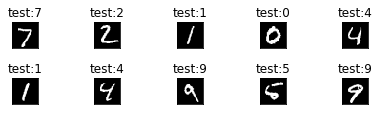

In [30]:
def plot_image(img,label,name):
    #create a figure
    fig=plt.figure()
    #set subplot figure
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307,cmap='gray',interpolation='none')
        plt.title("{}:{}".format(name,label[i].item()))
        #add xticks and yticks
        plt.xticks([])
        plt.yticks([])
    #show the whole picture
    plt.show()

x = test_x[:10]
predict = torch.max(cnn(x), 1)[1].data.numpy().squeeze()
plot_image(x,predict,'test')

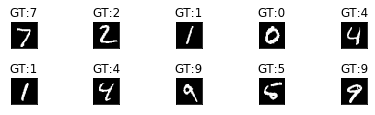

In [17]:
y = test_y[:10].numpy()
plot_image(x,y,'GT')